**Instituto de Informática - UFG**

Disciplina: Inteligência Artificial

Prof. Cedric Luiz de Carvalho


Grupo

---


Analista de dados: 
Isabela Felix França

---

Engenheiro de conhecimento: 
Daniel Campos da Silva

---


# Implementação de SVMs

## Obtendo e tratando os dados

In [1]:
# Os dados estão sem colunas, então vamos ter que setar
import pandas as pd 
cancer_dada = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', sep = ',', header=0)
cancer_dada.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 
                       'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
#Validando o que se encontra no tipo objeto
cancer_dada['Bare Nuclei'].unique()
#Será deletado o caracter ?
cancer_dada = cancer_dada[cancer_dada['Bare Nuclei'] != '?']
# Transformação do tipo objeto para um melhor trabalho com os valores
cancer_dada["Bare Nuclei"] = cancer_dada["Bare Nuclei"].astype(str).astype(int)
cancer_dada = cancer_dada.drop(['Sample code number'], axis=1)
trocar_valor_classe = {2: 0, 4: 1}
cancer_dada['Class'].replace(trocar_valor_classe, inplace=True)
cancer_dada

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1
...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,0
694,2,1,1,1,2,1,1,1,1,0
695,5,10,10,3,7,3,8,10,2,1
696,4,8,6,4,3,4,10,6,1,1


## Dividindo o conjunto de dados






In [2]:
from sklearn.model_selection import train_test_split
Y = cancer_dada["Class"]
X = cancer_dada.drop(labels="Class", inplace = False, axis = 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.5, random_state=0)

Escolhemos usar apenas a SVM SVC da SciKit Learn. Vamos testar diferentes Kernels: polinomial (e linear), RBF e sigmoidal. O parâmetro C é o quão fraca será a nossa regularização.

In [3]:
from sklearn import svm
linear = svm.SVC(kernel="linear", C=1000)
poly2 = svm.SVC(kernel="poly", degree = 2, C=1000)
poly3 = svm.SVC(kernel="poly", degree = 3, C=1000)
poly4 = svm.SVC(kernel="poly", degree = 4, C=1000)
rbf_auto = svm.SVC(kernel="rbf", gamma = 'auto', C=1000)
rbf_scale = svm.SVC(kernel="rbf", gamma = 'scale', C=1000)
sig = svm.SVC(kernel="sigmoid", C=1000)

labels = ["linear", "poly2", "poly3", "poly4", "rbf_auto", "rbf_scale", "sig"]
SVMs = [linear, poly2, poly3, poly4, rbf_auto, rbf_scale, sig]

for svm in SVMs:
  svm.fit(X_train, Y_train)

In [4]:
scores = []
for svm in SVMs:
  scores.append(svm.score(X_test, Y_test))

In [5]:
for i in range(0, len(SVMs)):
  print(labels[i], '=', scores[i])

linear = 0.9648093841642229
poly2 = 0.9120234604105572
poly3 = 0.9120234604105572
poly4 = 0.9237536656891495
rbf_auto = 0.9413489736070382
rbf_scale = 0.9354838709677419
sig = 0.3255131964809384


Pela performance da SVM linear, podemos assumir que o conjunto de dados é linearmente separável. Faremos alguns testes alterando parâmetros do classificador linear (logo, utilizaremos um kernel polinomial de grau 1).

In [19]:
# Variando o coeficiente da SVM linear
from sklearn import svm
coefs = [-100, -50, -20, -10, -5, -1, 0, 1, 5, 10, 20, 50, 100]

for coef in coefs:
  aux = svm.SVC(kernel="poly", degree = 1, coef0=coef)
  aux.fit(X_train, Y_train)
  print(coef, '=', aux.score(X_test, Y_test))

-100 = 0.9648093841642229
-50 = 0.9648093841642229
-20 = 0.9648093841642229
-10 = 0.9648093841642229
-5 = 0.9648093841642229
-1 = 0.9648093841642229
0 = 0.9648093841642229
1 = 0.9648093841642229
5 = 0.9648093841642229
10 = 0.9648093841642229
20 = 0.9648093841642229
50 = 0.9648093841642229
100 = 0.9648093841642229


In [21]:
# Variando a regularização da SVM linear
from sklearn import svm
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 50, 100, 200, 500, 800, 1000, 2000, 3000, 5000, 10000]

for C in Cs:
  aux = svm.SVC(kernel="poly", degree=1, C=C)
  aux.fit(X_train, Y_train)
  print(C, '=', aux.score(X_test, Y_test))

0.001 = 0.6510263929618768
0.01 = 0.9560117302052786
0.1 = 0.9648093841642229
1 = 0.9648093841642229
5 = 0.9648093841642229
10 = 0.9648093841642229
50 = 0.9648093841642229
100 = 0.9648093841642229
200 = 0.9648093841642229
500 = 0.9648093841642229
800 = 0.9648093841642229
1000 = 0.9648093841642229
2000 = 0.9648093841642229
3000 = 0.9648093841642229
5000 = 0.9648093841642229
10000 = 0.9648093841642229


Com exceção dos casos em que C é muito pequeno (portanto a SVM é muito rigorosa quanto suas margens), em que há piora nos resultados, nada se altera. Podemos usar os parâmetros padrão sem nenhum problema, nesse caso.

## Resultados

Observa-se que todos os modelos tiveram resultado acima de 90%, com exceção do Sigmoid. O modelo de melhor resultado foi o linear com 96% de acurácia, o que demonstra que o conjunto de dados é linearmennte separável.

In [23]:
linear = svm.SVC(kernel="linear")
linear.fit(X_train, Y_train)
linear.score(X_test, Y_test)

0.9648093841642229

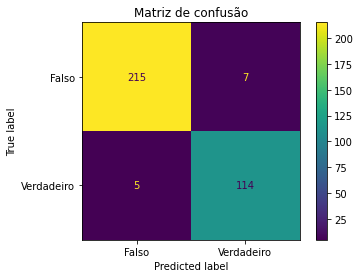

In [38]:
# Matriz de confusão
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(
        linear,
        X_test,
        Y_test,
        display_labels=['Falso', 'Verdadeiro'],
    )

disp.ax_.set_title("Matriz de confusão")
plt.show()

Basicamente não há desequilíbrio entre falsos e verdadeiros positivos e negativos. Alcançamos uma solução precisa e com pouco viés em relação às classes alvo.